In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset and checking for basic details

In [2]:
data = pd.read_excel('iris.xls')

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 5)

In [5]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [6]:
data['Classification'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Classification, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

<AxesSubplot:xlabel='SL', ylabel='Count'>

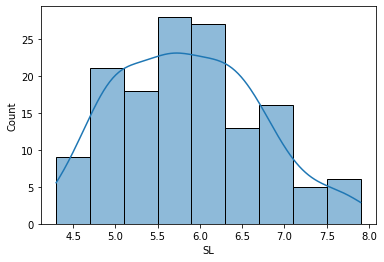

In [9]:
sns.histplot(x = 'SL', data=data, kde=True)

<AxesSubplot:xlabel='PL', ylabel='Count'>

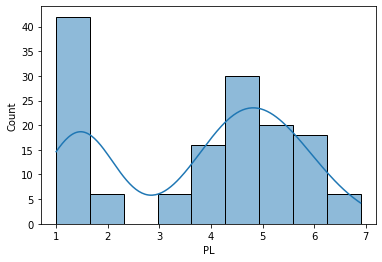

In [10]:
sns.histplot(x = 'PL', data=data, kde=True)

<AxesSubplot:xlabel='SW', ylabel='Count'>

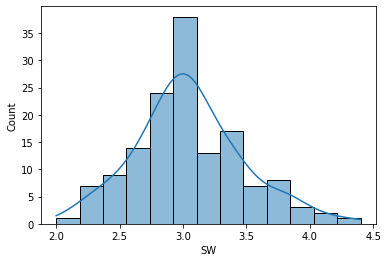

In [11]:
sns.histplot(x = 'SW', data=data, kde=True)

In [12]:
data.groupby(['Classification']).describe()

SL                                                     SW  \
                count      mean       std  min    25%   50%   75%  max count   
Classification                                                                 
Iris-setosa      47.0  5.008511  0.360452  4.3  4.800  5.00  5.20  5.8  47.0   
Iris-versicolor  48.0  5.925000  0.522474  4.9  5.600  5.85  6.30  7.0  48.0   
Iris-virginica   48.0  6.616667  0.598343  5.6  6.275  6.50  6.95  7.9  49.0   

                           ...     PL         PW                             \
                     mean  ...    75%  max count   mean       std  min  25%   
Classification             ...                                                
Iris-setosa      3.408511  ...  1.600  1.9  50.0  0.244  0.107210  0.1  0.2   
Iris-versicolor  2.781250  ...  4.600  5.1  50.0  1.326  0.197753  1.0  1.2   
Iris-virginica   2.967347  ...  5.825  6.9  50.0  2.026  0.274650  1.4  1.8   

                                
                 50%  75%  max  
Classification                  
Iris-setosa      0.2  0.3  0.6  
Iris-versicolor  1.3  1.5  1.8  
Iris-virginica   2.0  2.3  2.5  

[3 rows x 32 columns]

### Filling missing values

In [13]:
data['SL'].fillna(data['SL'].median(), inplace = True)

In [14]:
data['SW'].fillna(data['SW'].median(), inplace = True)

In [15]:
data['PL'].fillna(data['PW'].median(), inplace = True)

In [16]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

### Splitting into testing and training data

In [17]:
y  = data['Classification']

In [18]:
x = data.drop('Classification', axis=1)

In [19]:
x

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,5.8,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,1.3,2.0
148,6.2,3.4,5.4,2.3


In [20]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Classification, Length: 150, dtype: object

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=2)

###  Scaling the training and testing data

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Modeling 

#### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_pred_prob = lr.predict_proba(x_test)

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
accuracy_score(y_test, y_pred)

0.9777777777777777

In [25]:
confusion_matrix(y_test, y_pred)

array([[17,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 13]], dtype=int64)

#### KNN

##### Selecting value of 'k'

In [26]:
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier= KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    classifier.fit(x_train, y_train)
    y_pred= classifier.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    acc_values.append(acc)

Text(0, 0.5, 'accuracy')

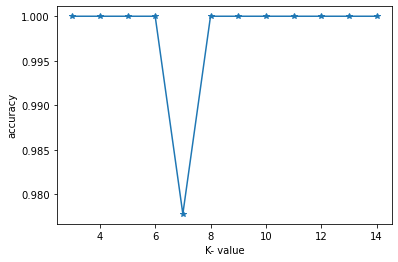

In [27]:
plt.plot(neighbors, acc_values, "*-")
plt.xlabel("K- value")
plt.ylabel('accuracy')

In [28]:
from sklearn.neighbors import KNeighborsClassifier

classifier= KNeighborsClassifier(n_neighbors=4, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred= classifier.predict(x_test)


In [29]:
accuracy_score(y_test, y_pred)

1.0

In [30]:
confusion_matrix(y_test, y_pred)

array([[17,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 13]], dtype=int64)

#### Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini', splitter='best', random_state=2 )
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

In [32]:
accuracy_score(y_test, y_pred)

0.9555555555555556

In [33]:
confusion_matrix(y_test, y_pred)

array([[17,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 12]], dtype=int64)

#### SVM

In [34]:
from sklearn.svm import SVC
svm_l = SVC(kernel= 'linear')
svm_l.fit(x_train, y_train)
y_pred = svm_l.predict(x_test)

In [35]:
accuracy_score(y_test, y_pred)

0.9777777777777777

In [36]:
confusion_matrix(y_test, y_pred)

array([[17,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 13]], dtype=int64)

#### Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

In [38]:
accuracy_score(y_test, y_pred)

0.9777777777777777

In [39]:
confusion_matrix(y_test, y_pred)

array([[17,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 13]], dtype=int64)

As Random forest, Logistic Regression and SVM gives an accuracy score of 97.7%, they can be used to best predict the iris species. KNN model is probably an overfit one.